In [129]:
import json, requests
import nltk
import re
from nltk.corpus import sentiwordnet as swn
import time
import timeit
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import pandas as pd
import numpy as np
import urllib.request, urllib.parse, urllib.error
import datetime

import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import zscore

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

from transformers import pipeline

import pyspark
import sys
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from operator import add
from pprint import pprint
import random
from random import sample 
from pyspark import SparkConf, SparkContext
from datetime import datetime
from operator import itemgetter
sc = pyspark.SparkContext.getOrCreate()

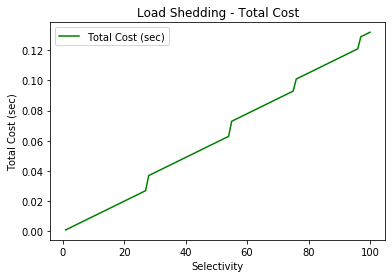

In [140]:
# Total Cost (sec)

ip = sc.textFile("X_new.csv")

X=[0 for a in range(100)]
Y=[0 for a in range(100)]
i=1
b = 0 
while i<=100:
    s=i   
    a1=datetime.now()
    a_operator = ip.filter(lambda x: x%2 == 1)
    a2=datetime.now()
    #microseconds
    micro1=0.000001*(a2-a1).microseconds
    #seconds
    second1=(a2-a1).seconds  
    #overall time passing A
    cost_a=second1+micro1
    b += cost_a
    tolerance = 1e-4
    if cost_a > tolerance:
        throughA=1/(cost_a*s)      
        throughA2=throughA
        X[i-1] = s
        Y[i-1]= b
        i=i+1
import matplotlib.pyplot as plt
plt.figure()  
plt.plot(X,Y, 'g')   
plt.xlabel('Selectivity')
plt.ylabel("Total Cost (sec)")
plt.legend(['Total Cost (sec)'])
plt.title('Load Shedding - Total Cost')
plt.show()

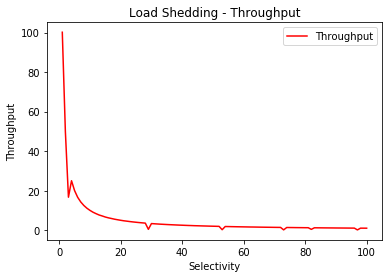

In [145]:
# Throughput

ip = sc.textFile("X_new.csv") \
#     .map(lambda line: line.split(",")).filter(lambda line :len(line)>3).map(lambda x : (x[0]))

# df1 = pd.DataFrame(ip, columns = ["price"])
# df1.to_csv("df1.csv", index=False)
# df1 = sc.textFile("df1.csv").map(lambda line: line.split(",")).collect()
# # print(df1)
# df1 = pd.DataFrame(df1, columns = ["price"])
# print(df1)

X1=[0 for a in range(100)]
Y1=[0 for a in range(100)]
i=1

while i<=100:
    s=float(i)   
    a1=datetime.now()
    a_operator = ip.filter(lambda x: x%2 == 1)

    a2=datetime.now()
    #microseconds
    micro1=0.000001*(a2-a1).microseconds
    #seconds
    second1=(a2-a1).seconds  
    #overall time passing A
    cost_a=second1+micro1
    tolerance = 1e-4
    if cost_a > tolerance:
        throughA=1/(cost_a*s)
                
        throughA2=throughA
        X1[i-1] = s
        Y1[i-1]=throughA2/10
        i=i+1
import matplotlib.pyplot as plt
plt.figure()  
plt.plot(X1,Y1, 'r')   
plt.xlabel('Selectivity')
plt.ylabel("Throughput")
plt.legend(['Throughput'])
plt.title('Load Shedding - Throughput')
plt.show()


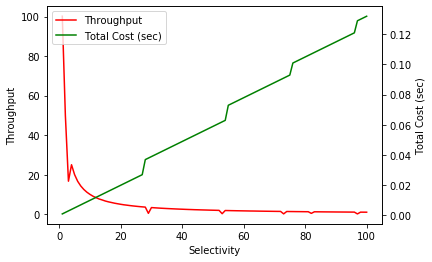

In [146]:
# Throughput vs Total Cost (sec)

ax1 = plt.gca()
line1, = ax1.plot(X,Y1, c = 'r')
ax2 = ax1.twinx()
line2, = ax2.plot(X,Y, c = 'g')
ax1.set_xlabel("Selectivity")
ax1.set_ylabel("Throughput")
ax2.set_ylabel("Total Cost (sec)")
ax2.legend((line1,line2), ("Throughput", "Total Cost (sec)"))

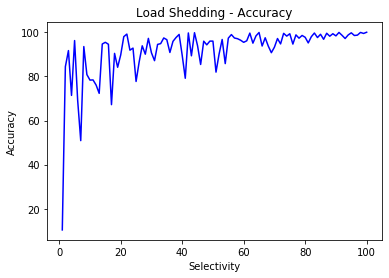

In [144]:
# Accuracy


# Generate Uniform Integer Array of n values
from random import sample
n = 100
s = np.random.randint(100, size = (n, ))
average_array = np.average(s)
# s_1 = sample(pd.Series(s).to_list(),3)
X2=[0 for a in range(100)]
Y2=[0 for a in range(100)]
i = 1
t = 1
u = 1

while i<=100:
    u=float(i) 
    s_1 = sample(pd.Series(s).to_list(),t)
    #print(s_1)
    average1 = np.average(s_1)
    accuracy_100 = (average1-average_array)/average_array
    accuracy1 = abs(accuracy_100)
    #print(1-accuracy1)
    X2[i-1] = u
    Y2[i-1]=(1-accuracy1) * 100
    t=t+1
    i=i+1
plt.figure()  
plt.plot(X2,Y2, 'b')   
plt.ylabel('Accuracy')
plt.xlabel('Selectivity')
plt.title('Load Shedding - Accuracy')
#plt.axis([0, 1, 0, 1])
plt.show()

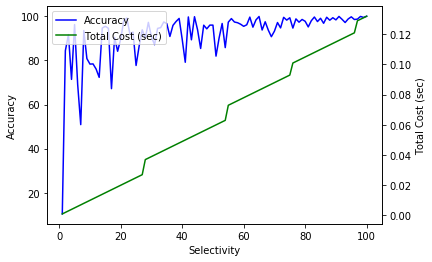

In [147]:
# Accuracy vs Total Cost

ax1 = plt.gca()
line1, = ax1.plot(X,Y2, c = 'b')
ax2 = ax1.twinx()
line2, = ax2.plot(X,Y, c = 'g')
ax1.set_xlabel("Selectivity")
ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Total Cost (sec)")
ax2.legend((line1,line2), ("Accuracy", "Total Cost (sec)"))

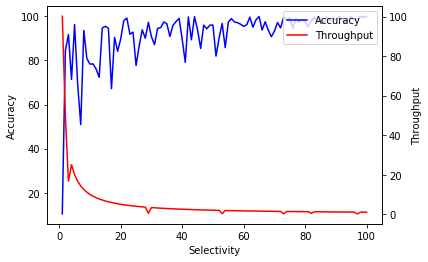

In [149]:
# Accruacy vs Throughput

ax1 = plt.gca()
line1, = ax1.plot(X,Y2, c = 'b')
ax2 = ax1.twinx()
line2, = ax2.plot(X,Y1, c = 'r')
ax1.set_xlabel("Selectivity")
ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Throughput")
ax2.legend((line1,line2), ("Accuracy", "Throughput"))